In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import mnist

In [3]:
print("Loading dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading dataset...


In [5]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
print(f"Original dataset shape: {X_train.shape}")

Original dataset shape: (60000, 784)


In [7]:
print("Applying PCA...")
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Reduced dataset shape with PCA: {X_train_pca.shape}")

Applying PCA...
Reduced dataset shape with PCA: (60000, 154)


In [9]:
print("Training classifier on original dataset...")
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy on original dataset: {accuracy_original:.4f}")

Training classifier on original dataset...
Accuracy on original dataset: 0.9704


In [11]:
print("Training classifier on PCA-reduced dataset...")
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on PCA-reduced dataset: {accuracy_pca:.4f}")

Training classifier on PCA-reduced dataset...
Accuracy on PCA-reduced dataset: 0.9482


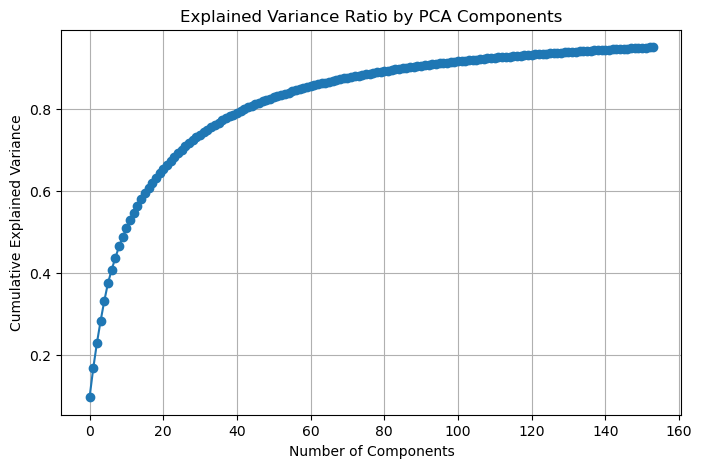

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance Ratio by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [15]:
print("\nClassification Report on Original Dataset:")
print(classification_report(y_test, y_pred_original))

print("\nClassification Report on PCA-Reduced Dataset:")
print(classification_report(y_test, y_pred_pca))

print(f"\nTrade-offs:")
print(f"- Original accuracy: {accuracy_original:.4f}")
print(f"- PCA accuracy: {accuracy_pca:.4f}")
print(f"- Dimensionality reduced from {X_train.shape[1]} to {X_train_pca.shape[1]} with PCA.")


Classification Report on Original Dataset:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Classification Report on PCA-Reduced Dataset:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.